In [5]:
import dlib

In [6]:
!pip install easyocr

  Using cached python_bidi-0.4.2-py2.py3-none-any.whl (30 kB)
  Attempting uninstall: decorator
    Found existing installation: decorator 5.0.9
    Uninstalling decorator-5.0.9:
      Successfully uninstalled decorator-5.0.9


In [9]:
!pip install imutils

  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25860 sha256=709f689b24ab178a5ced0ac59e6487be9f90c7e72aba9da1b032d2fac2c0f68c
  Stored in directory: c:\users\tolba\appdata\local\pip\cache\wheels\f5\0c\3a\61b992f7aa85de40f339e6d4970d91dddb103dd0ad6c5d58f2
Successfully built imutils


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import imutils
import os
import easyocr
import cv2

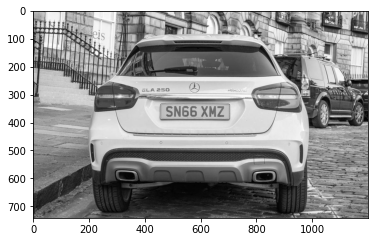

In [14]:
img = cv2.imread("Car_plate.jpg")
gray = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray , cv2.COLOR_BGR2RGB))

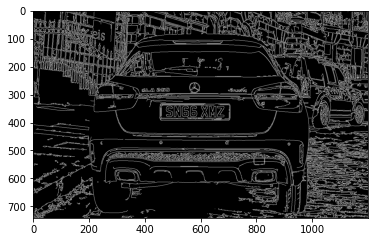

In [31]:
bfilter = cv2.bilateralFilter(gray, 15 , 17 , 17) # Noise
edged = cv2.Canny(bfilter , 30 , 200) # Edge detection
plt.imshow(cv2.cvtColor(edged , cv2.COLOR_BGR2RGB ))


In [32]:
keypoints = cv2.findContours(edged.copy() , cv2.RETR_TREE , cv2.CHAIN_APPROX_SIMPLE)
contourss = imutils.grab_contours(keypoints)
contours = sorted(contourss , key = cv2.contourArea , reverse = True)[:10]
len(contours)

10

In [35]:
location = None

for contour in contours:
    approx = cv2.approxPolyDP(contour , 10 , True) # Contour |__ , max distance , Closed
    
    if len(approx) == 4:
        location = approx
        break
        
print(len(location))
location

4


array([[[455, 336]],

       [[458, 393]],

       [[706, 385]],

       [[702, 334]]], dtype=int32)

In [36]:
approx[2][0][0]

706

In [45]:
mask = np.zeros(gray.shape , np.uint8)
new_image = cv2.drawContours(mask , [location] , -1 , 255 , -1) # mask Black photo , location Index of plate -1 All Contours , 255 color
new_image = cv2.bitwise_and(img,img,mask=mask)

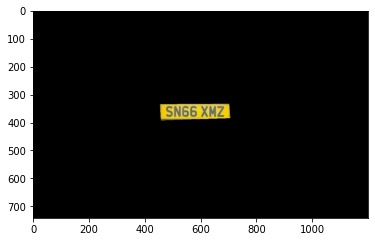

In [46]:
plt.imshow(cv2.cvtColor(new_image , cv2.COLOR_BGR2RGB))

In [48]:
(x,y) = np.where(mask==255)
(x1,y1) = (np.min(x) , np.min(y))
(x2,y2) = (np.max(x) , np.max(y))
cropped_image = gray[x1:x2+1 , y1:y2+1] # Crop Image From Gray Image

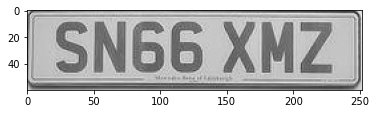

In [49]:
plt.imshow(cv2.cvtColor(cropped_image , cv2.COLOR_BGR2RGB))

In [50]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


C:\Users\Tolba\anaconda3\envs\ahmed36\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


[([[16, 2], [238, 2], [238, 56], [16, 56]], 'SN66 XMZ', 0.8903118083336256)]

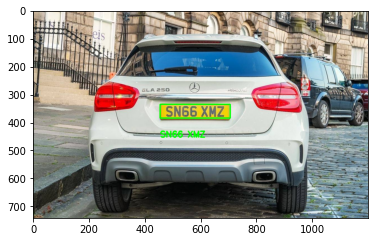

In [65]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img , text = text , org=(approx[0][0][0] , approx[1][0][1]+60 ), fontFace=font , fontScale = 1 , color = (0,255,0) , thickness=4  )
res = cv2.rectangle(img , tuple(approx[0][0]) , tuple(approx[2][0]) , (0,255,0) , 3)

plt.imshow(cv2.cvtColor(res , cv2.COLOR_BGR2RGB))